In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("DoctorVisits-DA.csv")

In [3]:
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [13]:
df.drop_duplicates()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [15]:
df_cleaned = df.drop_duplicates()

In [16]:
len(df_cleaned)

5190

In [17]:
print("no. of duplicates:", len(df)-len(df_cleaned))

no. of duplicates: 0


In [19]:
df["illness"].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [24]:
df.groupby('illness').nunique()

,Unnamed: 0,visits,gender,age,income,reduced,health,private,freepoor,freerepat,nchronic,lchronic
illness,,,,,,,,,,,,
0,1554,5,2,12,14,4,10,2,2,2,2,2
1,1638,9,2,12,14,14,13,2,2,2,2,2
2,946,9,2,12,14,14,13,2,2,2,2,2
3,542,8,2,12,14,13,13,2,2,2,2,2
4,274,7,2,12,14,13,13,2,2,2,2,2
5,236,9,2,12,14,14,13,2,2,2,2,2


In [25]:
df["gender"].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

In [ ]:
# Calculate maximum, minimum, and median income
max_income = df['income'].max()
min_income = df['income'].min()
median_income = df['income'].median()

print(f"Maximum Income: {max_income}")
print(f"Minimum Income: {min_income}")
print(f"Median Income: {median_income}")
pl


Maximum Income: 1.5
Minimum Income: 0.0
Median Income: 0.55


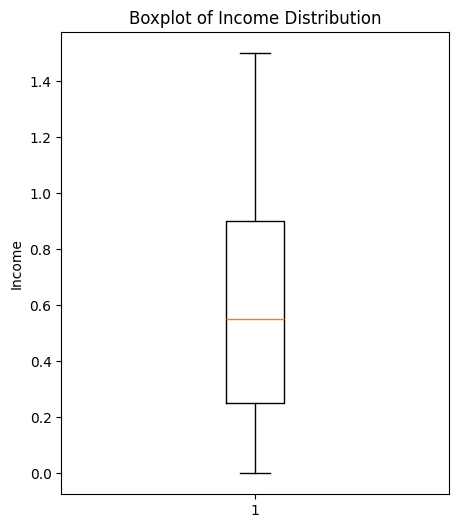

In [31]:
import matplotlib.pyplot as plt

# Create a vertical boxplot for the 'income' column
plt.figure(figsize=(5, 6))
plt.boxplot(df['income'], vert=True)
plt.ylabel('Income')
plt.title('Boxplot of Income Distribution')
plt.show()


In [37]:
df.groupby(['gender', 'reduced']).mean(numeric_only=True)

Unnamed: 0    visits       age    income   illness    health
gender reduced                                                               
female 0        2524.038512  0.229322  0.465755  0.482735  1.462144  1.115098
       1        1985.768421  0.400000  0.325684  0.542105  2.242105  1.610526
       2        1622.618182  0.672727  0.391455  0.560182  2.236364  1.781818
       3         997.311111  1.333333  0.403111  0.516000  2.733333  1.733333
       4        1237.740741  0.851852  0.458889  0.466667  2.222222  2.074074
       5        1169.055556  1.444444  0.401667  0.614444  2.222222  2.500000
       6        1382.545455  1.363636  0.426364  0.622727  2.363636  1.363636
       7        1034.846154  1.384615  0.436154  0.473462  2.653846  2.230769
       8        1883.090909  1.090909  0.471818  0.404545  2.181818  4.000000
       9        1349.000000  0.500000  0.570000  0.825000  3.000000  1.000000
       10       1099.428571  2.142857  0.512857  0.421429  2.571429  2.000000
       12       1661.000000  2.000000  0.720000  0.250000  3.500000  5.500000
       13        906.000000  4.000000  0.720000  0.300000  4.500000  3.500000
       14       1392.112069  1.543103  0.551724  0.427586  2.534483  4.112069
male   0        3008.911019  0.136007  0.344703  0.694398  1.099585  0.924850
       1        2485.158537  0.304878  0.286220  0.676341  1.743902  1.256098
       2        2007.679245  0.471698  0.343585  0.653019  2.358491  1.547170
       3        1909.068966  0.724138  0.334138  0.741379  2.137931  1.689655
       4        1424.000000  0.722222  0.309444  0.869444  2.055556  2.000000
       5        1437.272727  1.136364  0.331818  0.570455  2.272727  2.818182
       6         562.000000  0.833333  0.340000  0.591667  2.500000  2.000000
       7        1716.750000  0.750000  0.314167  0.655000  2.583333  4.333333
       8         680.666667  1.333333  0.365000  0.833333  2.666667  2.000000
       9        1375.400000  2.200000  0.310000  0.392000  2.400000  2.000000
       10       1543.200000  1.800000  0.480000  0.590000  2.600000  4.600000
       11        355.500000  5.000000  0.320000  1.000000  1.500000  0.500000
       12        781.500000  2.000000  0.370000  0.515000  1.500000  1.000000
       13        508.666667  4.000000  0.510000  0.350000  3.333333  2.333333
       14       1236.069444  1.555556  0.476806  0.598611  2.375000  3.527778

Average days of reduced activity by gender:
gender
female    0.975574
male      0.738344
Name: reduced, dtype: float64


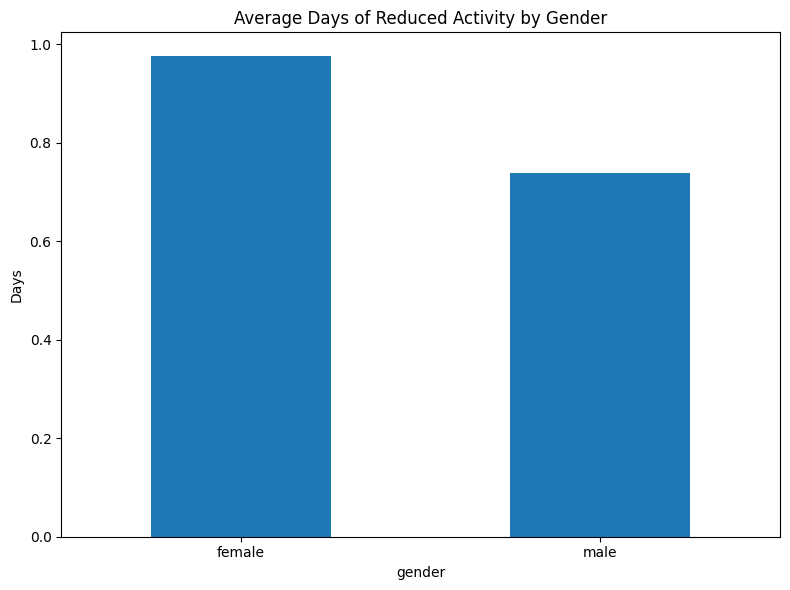

In [38]:

# Calculate average reduced activity by gender
reduced_by_gender = df.groupby('gender')['reduced'].mean()
print("\
Average days of reduced activity by gender:")
print(reduced_by_gender)

# Create a bar plot
plt.figure(figsize=(8, 6))
reduced_by_gender.plot(kind='bar')
plt.title('Average Days of Reduced Activity by Gender')
plt.ylabel('Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

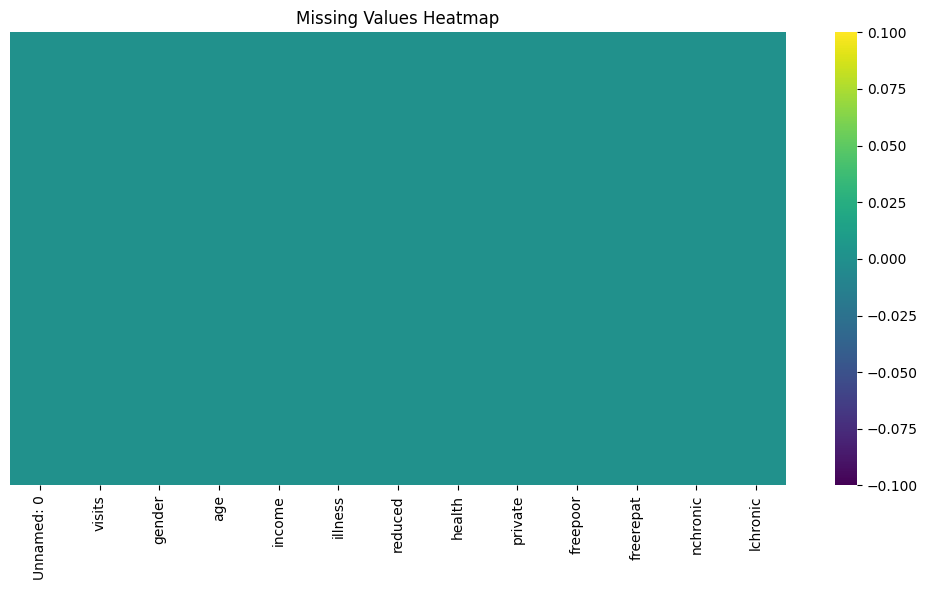

In [50]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()



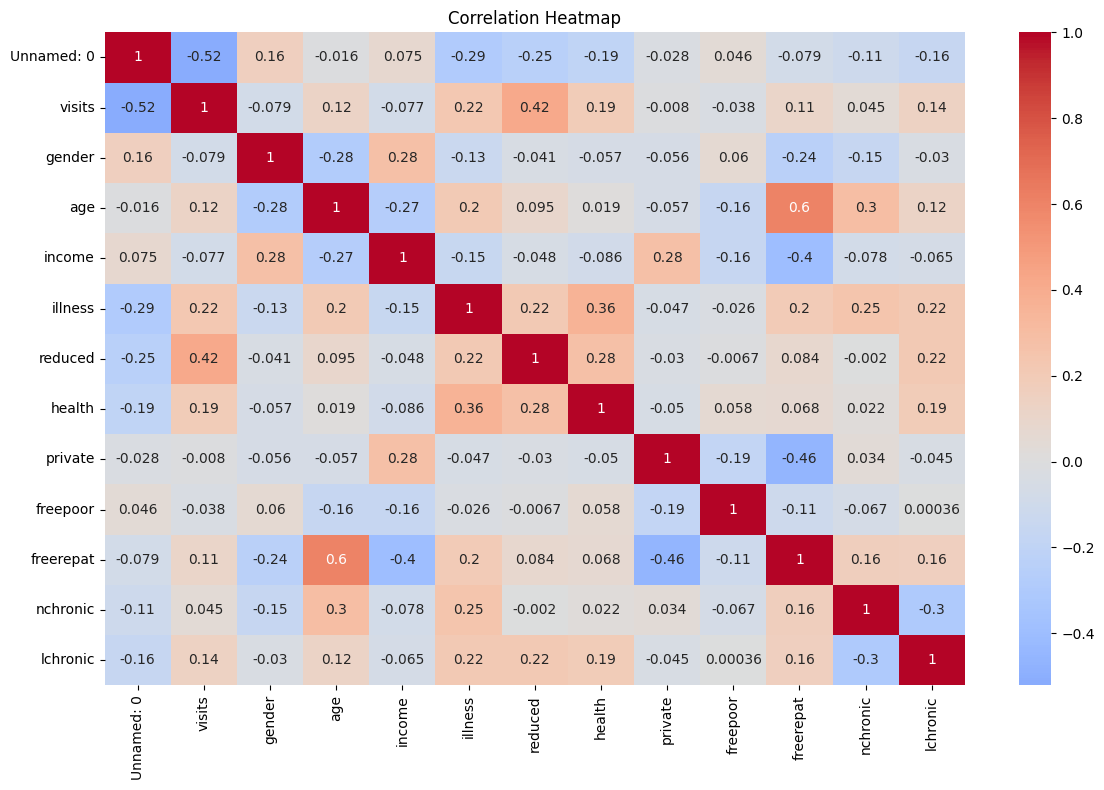

In [51]:
# Correlation heatmap
# Convert categorical variables to numeric
df_numeric = df.copy()
df_numeric['gender'] = df_numeric['gender'].map({'female': 0, 'male': 1})
df_numeric['private'] = df_numeric['private'].map({'yes': 1, 'no': 0})
df_numeric['freepoor'] = df_numeric['freepoor'].map({'yes': 1, 'no': 0})
df_numeric['freerepat'] = df_numeric['freerepat'].map({'yes': 1, 'no': 0})
df_numeric['nchronic'] = df_numeric['nchronic'].map({'yes': 1, 'no': 0})
df_numeric['lchronic'] = df_numeric['lchronic'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

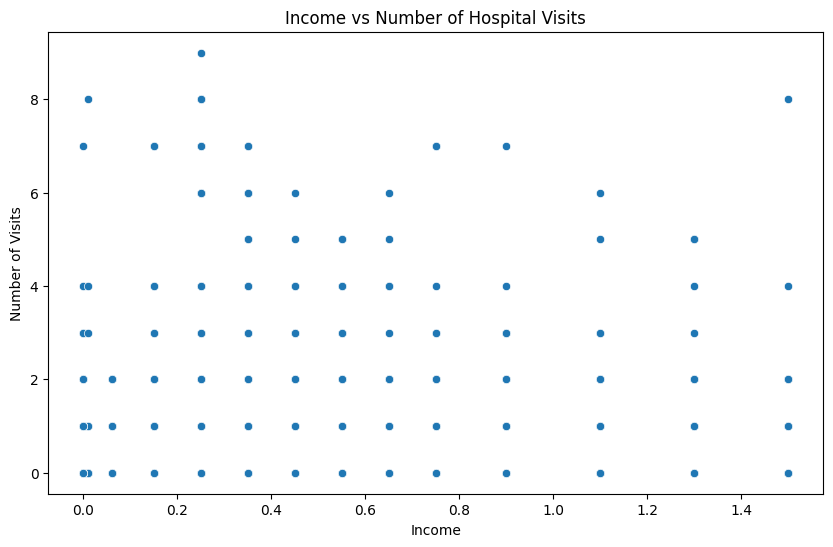

In [48]:
# Income vs Visits scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='visits')
plt.title('Income vs Number of Hospital Visits')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()



<Figure size 1000x600 with 0 Axes>

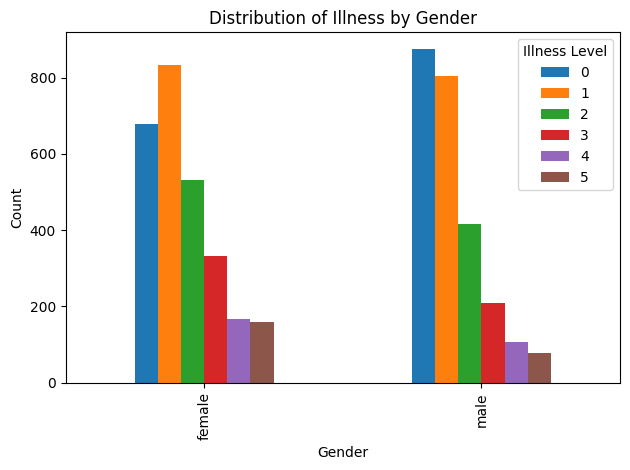

In [49]:
# Count of illness by gender
illness_by_gender = df.groupby(['gender', 'illness']).size().unstack()
plt.figure(figsize=(10, 6))
illness_by_gender.plot(kind='bar')
plt.title('Distribution of Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Illness Level')
plt.tight_layout()
plt.show()

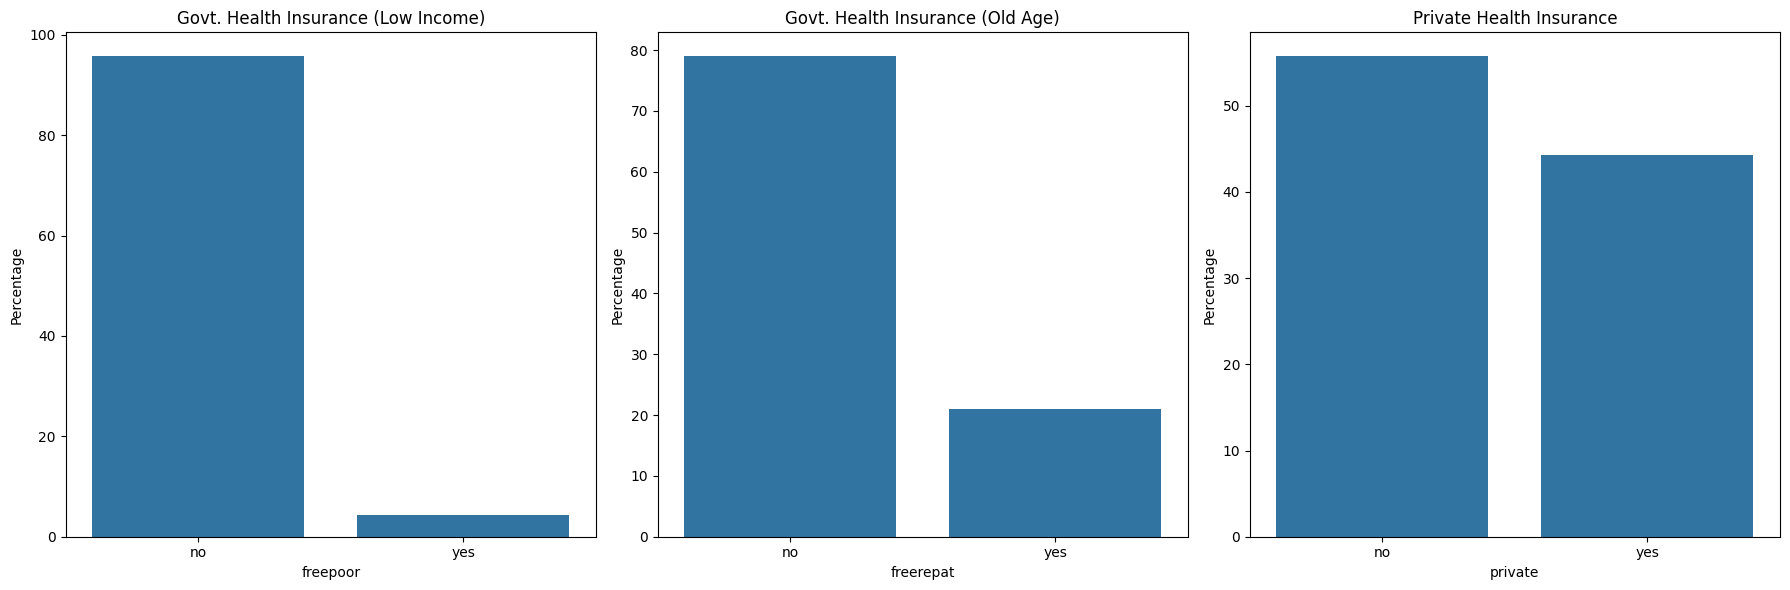

In [41]:
# Calculate percentages for government and private health insurance
num_people = len(df)

# Government health insurance due to low income
govt_low_income = df['freepoor'].value_counts(normalize=True) * 100

# Government health insurance due to old age
govt_old_age = df['freerepat'].value_counts(normalize=True) * 100

# Private health insurance
private_insurance = df['private'].value_counts(normalize=True) * 100

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Govt. health insurance due to low income
sns.barplot(x=govt_low_income.index, y=govt_low_income.values, ax=ax[0])
ax[0].set_title('Govt. Health Insurance (Low Income)')
ax[0].set_ylabel('Percentage')

# Govt. health insurance due to old age
sns.barplot(x=govt_old_age.index, y=govt_old_age.values, ax=ax[1])
ax[1].set_title('Govt. Health Insurance (Old Age)')
ax[1].set_ylabel('Percentage')

# Private health insurance
sns.barplot(x=private_insurance.index, y=private_insurance.values, ax=ax[2])
ax[2].set_title('Private Health Insurance')
ax[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

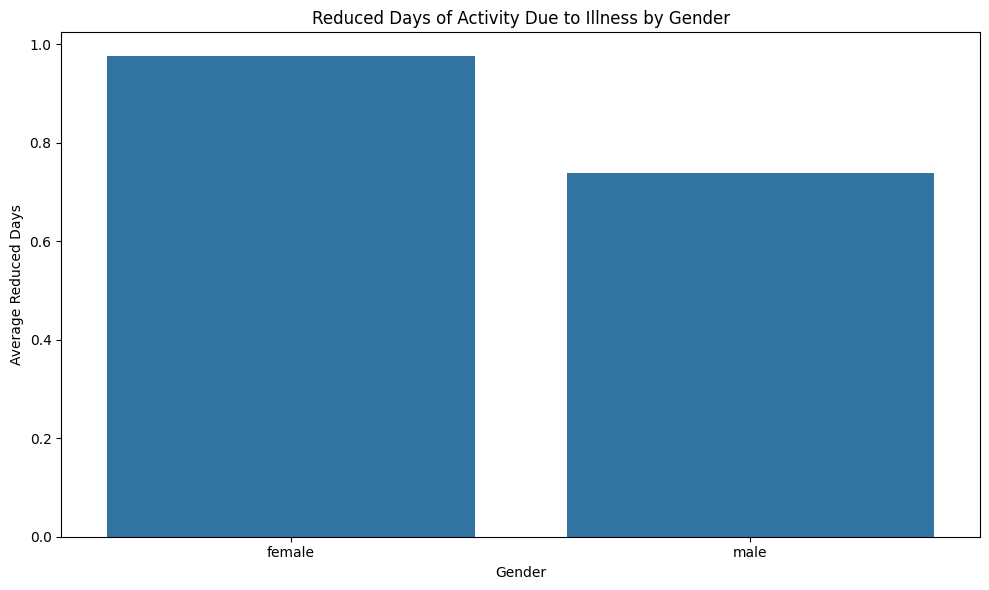

In [46]:
# Bar chart for reduced days of activity due to illness based on gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='reduced', errorbar=None)
plt.title('Reduced Days of Activity Due to Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Reduced Days')
plt.tight_layout()
plt.show()

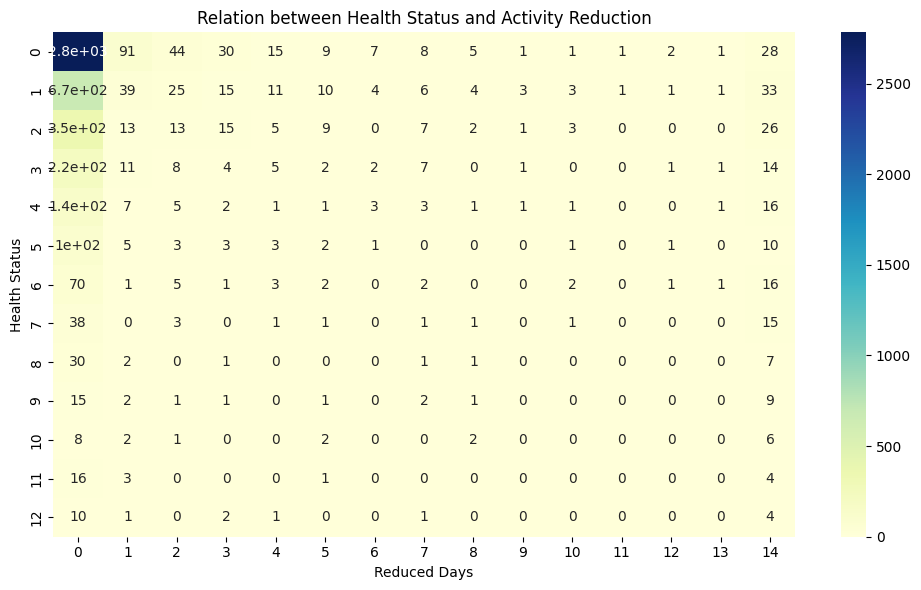

In [44]:
# Heatmap for relation between health status and activity reduction
plt.figure(figsize=(10, 6))
health_reduction = df.pivot_table(index='health', columns='reduced', aggfunc='size', fill_value=0)
sns.heatmap(health_reduction, annot=True, cmap='YlGnBu')
plt.title('Relation between Health Status and Activity Reduction')
plt.xlabel('Reduced Days')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()

Age range in dataset:
Minimum age: 0.19
Maximum age: 0.72
Detailed visits by age group:
           mean  count
age_group             
0-25        0.3   5190


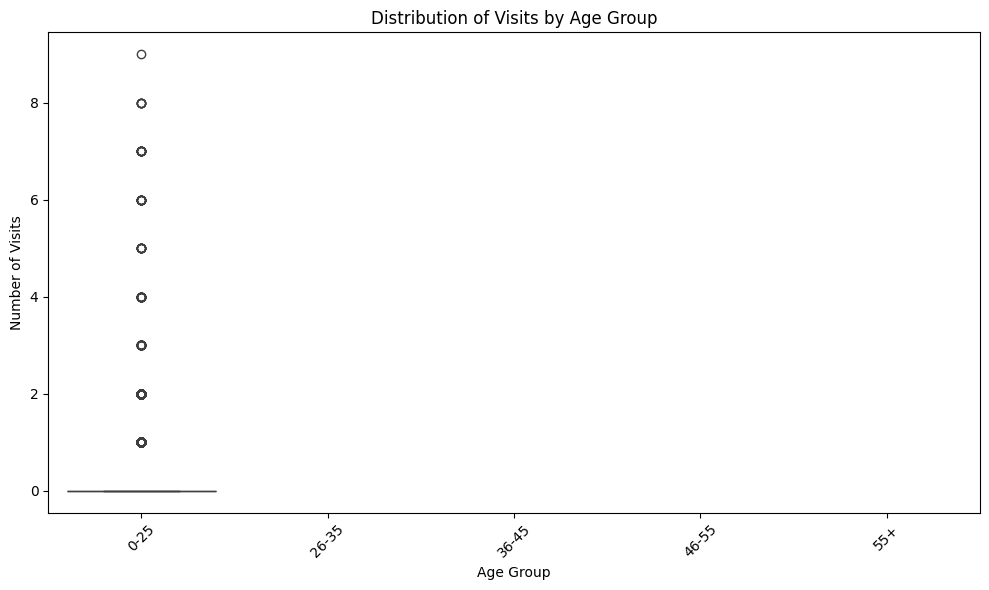

In [ ]:

# First, let's see the actual range of ages in our dataset
print("Age range in dataset:")
print("Minimum age:", df['age'].min())
print("Maximum age:", df['age'].max())

# Create more appropriate age bins based on the actual data
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 25, 35, 45, 55, 100],
                        labels=['0-25', '26-35', '36-45', '46-55', '55+'])

# Calculate average visits by age group
avg_visits = df.groupby('age_group', observed=True)['visits'].agg(['mean', 'count']).round(2)
print("\
Detailed visits by age group:")
print(avg_visits)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='visits')
plt.title('Distribution of Visits by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Detailed visits by age group (in months):
                  mean  count
age_group_months             
0-3 months        0.21   1965
4-6 months        0.26   1277
7-9 months        0.43   1948


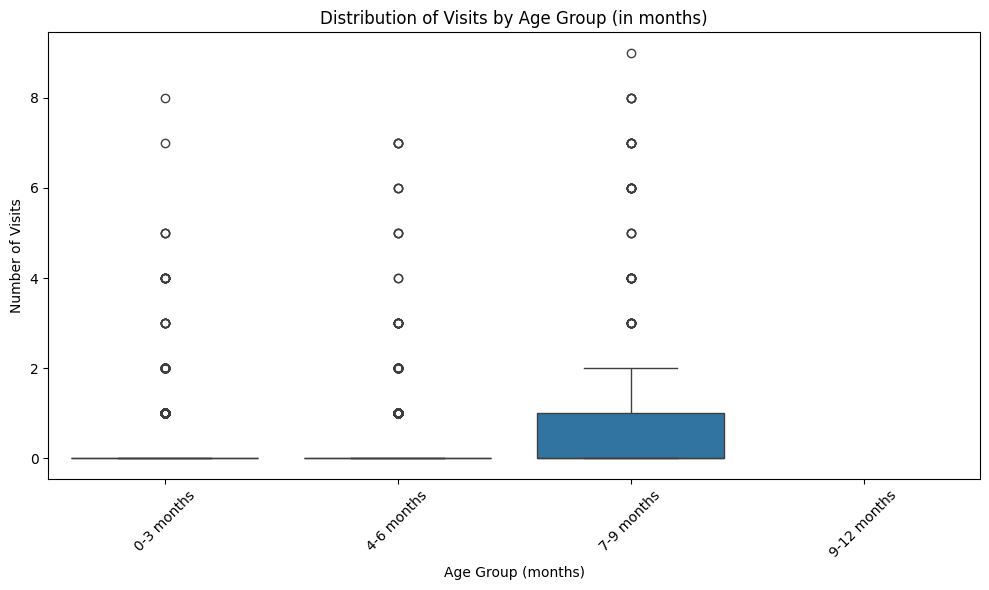

In [58]:


# Create more appropriate age bins for infants (in months)
df['age_months'] = df['age'] * 12  # Convert years to months
df['age_group_months'] = pd.cut(df['age_months'], 
                               bins=[0, 3, 6, 9, 12],
                               labels=['0-3 months', '4-6 months', '7-9 months', '9-12 months'])

# Calculate average visits by age group (in months)
avg_visits_months = df.groupby('age_group_months', observed=True)['visits'].agg(['mean', 'count']).round(2)
print("\
Detailed visits by age group (in months):")
print(avg_visits_months)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group_months', y='visits')
plt.title('Distribution of Visits by Age Group (in months)')
plt.xlabel('Age Group (months)')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



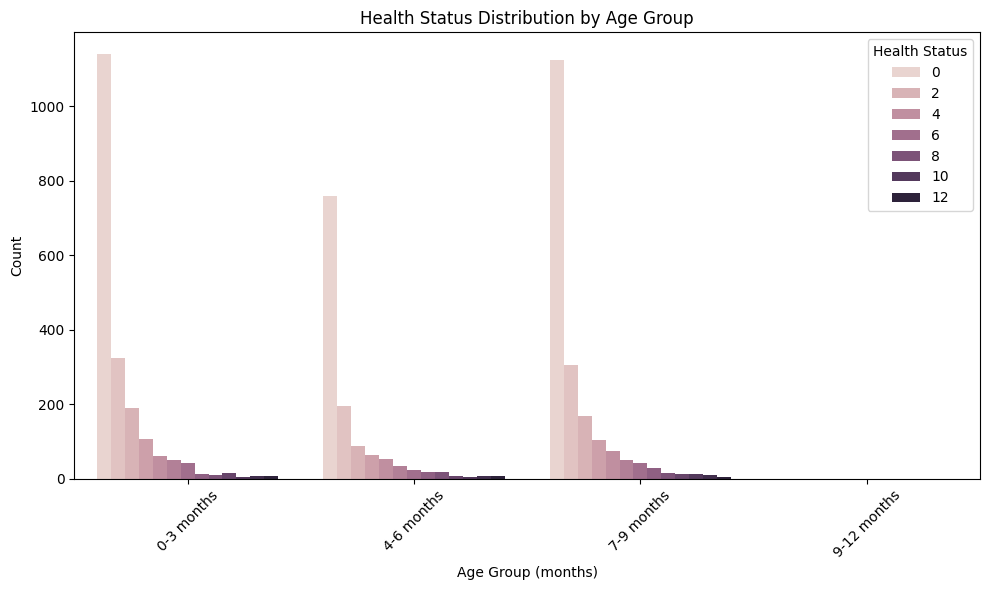

In [59]:
# Additional analysis: Health status distribution by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group_months', hue='health')
plt.title('Health Status Distribution by Age Group')
plt.xlabel('Age Group (months)')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()